---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "A quick look at Indonesia's current account and balance of trade using World Bank's API in Python"
subtitle: ""
summary: ""
authors: [admin]
tags: [python, economics]
categories: [python, economics]
date: 2020-10-21T21:07:25+11:00
lastmod: 2020-10-21T21:07:25+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: ""
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---

Indonesia has been always famed for its lack of depth and innovation in its financial market. Banks are powerful and aim mostly at consumer banking. Indeed, the role of foreign investment is quite central to Joko 'Jokowi' Widodo's development policy, from building infrastructures and the same-price gasoline policy, both relies on SOE's corporate bonds, to attracting FDI to provide jobs. The high influx of foreign investment of course leads to a current account deficit, which means increase the surge of imports. This is a basic GDP accounting where current account balance is $=S-I=X-M$.

Interestingly, minimizing Current Account Deficit (CAD) has been something Indonesian government set as their de facto policy targeting. Targeting CAD may be important(?) for stability, but might not be something you would want if you aim for growth. In this blog, I try to have a look at Indonesia's CAD, what's causing it, and a bit of insight from looking at it. My visualization relies on Python's Seaborn and [World Bank's API manager](https://github.com/OliverSherouse/wbdata), `wbdata`. My learning resources are [Abdul Baqi's blog](http://abdulbaqi.io/2017/09/13/Wdi/) and World Bank's [blog](https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata) and [documentation](https://wbdata.readthedocs.io/en/stable/).

## Using wbdata

install it first using:

```
pip install -U wbdata
```

We then import it and see what are the source.

In [15]:
import wbdata as wb

wb.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

So many databases, but we will get what we want from World Development Indicators, number 2 on the above list. Now, let's search current account balance in the database

In [16]:
wb.search_indicators('current account balance',source=2)

id                 name
-----------------  ------------------------------------------
BN.CAB.XOKA.CD     Current account balance (BoP, current US$)
BN.CAB.XOKA.GD.ZS  Current account balance (% of GDP)

I will use one with % of GDP. I will take the current account balance only for Indonesia and only from 1981 to 2019. Don't forget to create a datetime tuple to limit the year you're taking.

In [88]:
import pandas as pd
import datetime
tanggal=(datetime.datetime(1981,1,1), datetime.datetime(2019,1,1))
a=wb.get_dataframe({"BN.CAB.XOKA.GD.zS" : "Current account balance (% of GDP)"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
a=a.reset_index()
a.head()

,country,date,Current account balance (% of GDP)
0,Indonesia,2019-01-01,-2.714101
1,Indonesia,2018-01-01,-2.939161
2,Indonesia,2017-01-01,-1.594657
3,Indonesia,2016-01-01,-1.819151
4,Indonesia,2015-01-01,-2.035042


Let's visualize it with seaborn

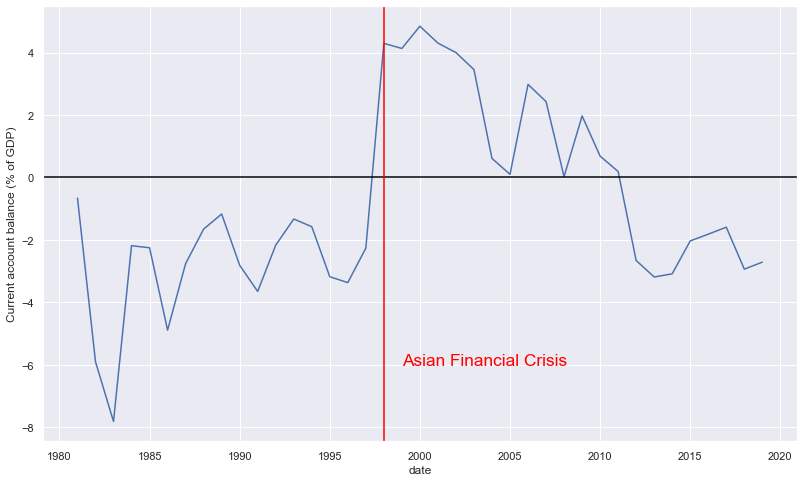

In [108]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5,8))
graph1=sns.lineplot(x="date", y="Current account balance (% of GDP)",data=a)
graph1.axhline(0, color='black')
graph1.axvline(datetime.datetime(1998,1,1), color='red')
graph1.text(datetime.datetime(1999,1,1),-6, "Asian Financial Crisis",color='red',size='x-large')
plt.show()

The above graph is Indonesia's current account balance. I suppose it is clear to us that Indonesia were running a current account deficit since the collapse of oil price in the early 80s. Financial liberalization were then took place around the same period and was getting more progressive up until right before Asian Financial Crisis (AFC) in 1998. Indeed, running a mismanaged CAD is somewhat dangerous when the investment is not allocated efficiently. Those investment were not productive and Indonesia failed to earn enough foreign currency to pay back its debt. The economy was then crash, and perhaps haunt us until now. This is, perhaps, the reason why we hate CAD so much.

Indonesia was having a positive current account since then, but starting 2011, the CAD started to happen. Since then, CAD has been happening consistently up until now. The anti-import sentiment was return, and the government has been rising Non-Tariff Measures to combat it. In fact, according to [ERIA's publication](https://www.eria.org/uploads/media/10.ERIA_Book_2019_NTM_Update_Chapter_3.pdf), NTM shot up by almost 30% in numbers, from 2015 to 2018.

## What causes our CAD?

Interestingly, Indonesia's trade balance (export - import) has always been positive. We have been exporting enough to offset our import. Our deficit was mainly driven by a negative net primary income. The negative net primary income was driven by interest payment from portfolio and FDI. Indonesia's foreign investment inflow has largely been used to actually pay these interests. That's one reason why Indonesian policy makers talk a lot on speeding up growth and improving export relative to import, because reducing net primary income deficit is much harder in the short run.

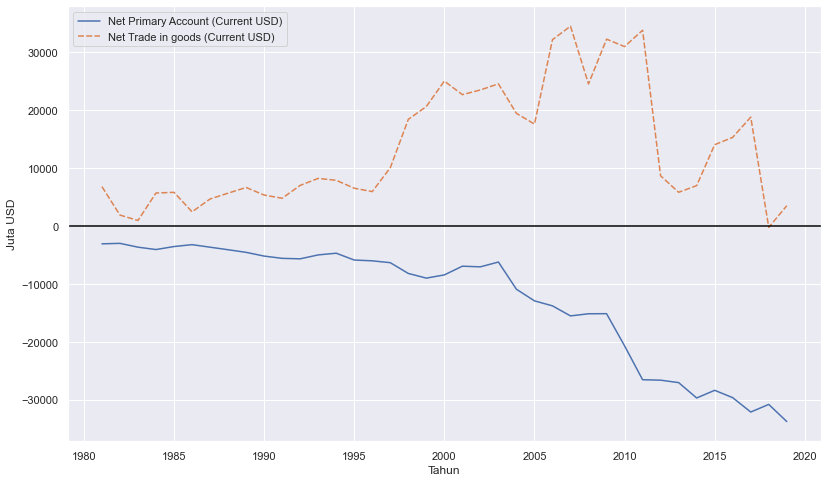

In [87]:
b=wb.get_dataframe({"BN.GSR.FCTY.CD" : "Net Primary Account (Current USD)"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
b=b.reset_index()
b.head()
c=wb.get_dataframe({"BN.GSR.MRCH.CD" : "Net Trade in goods (Current USD)"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
c=c.reset_index()
b["Net Trade in goods (Current USD)"]=c["Net Trade in goods (Current USD)"]/1000000
b["Net Primary Account (Current USD)"]=b["Net Primary Account (Current USD)"]/1000000
b=b.set_index('date')
del b['country']
plt.figure(figsize=(13.5,8))
graph2=sns.lineplot(data=b)
graph2.axhline(color='black')
graph2.set(ylabel='Juta USD',xlabel='Tahun')
plt.show()

## Increasing export or reducing import?

If we take a look at the graph below, Indonesia's import follows its export closely. 

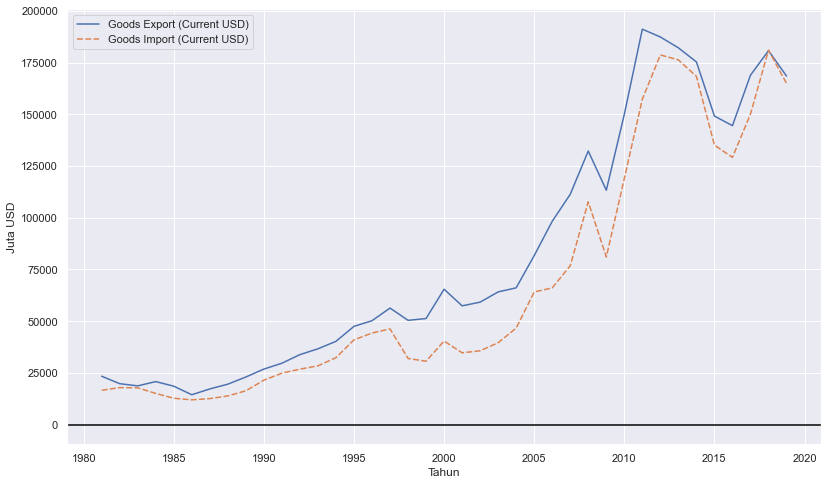

In [92]:
b=wb.get_dataframe({"BX.GSR.MRCH.CD" : "Goods Export (Current USD)"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
b=b.reset_index()
b.head()
c=wb.get_dataframe({"BM.GSR.MRCH.CD" : "Goods Import (Current USD)"}, country=["IDN"], data_date=tanggal, convert_date=True, keep_levels=True)
c=c.reset_index()
b["Goods Export (Current USD)"]=b["Goods Export (Current USD)"]/1000000
b["Goods Import (Current USD)"]=c["Goods Import (Current USD)"]/1000000
b=b.set_index('date')
del b['country']
plt.figure(figsize=(13.5,8))
graph2=sns.lineplot(data=b)
graph2.set(ylabel='Juta USD',xlabel='Tahun')
plt.show()

Improving export in the short run can be challenging, especially given the current global situation. Indonesia's two main industries mining and plantation, are still performing quite well, but these two commodities are very sensitive to price volatility, and [COVID-19 makes it worse](https://www.eastasiaforum.org/2020/07/16/covid-19-punishes-indonesian-commodity-exporters/).

Unfortunately, trying to reduce import is also not ideal. Indonesian imports are currently consist of many industrial supplies and capital goods, needed for firms to operate. In fact, for firms operate in the Global Value Chain (GVC), imported inputs are crucial for them to be competitive in the global market. This is perhaps the reason why Indonesian import and export are moving together, because its exporting firms need imports to be able to export. Reducing imports can be bad both in the short run (industrial supplies) and in the long run (capital goods).

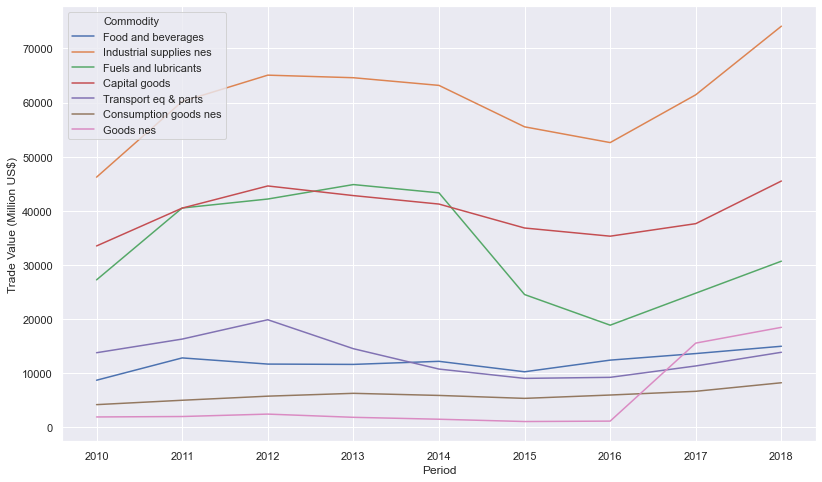

In [85]:
# This one's not using WBdata. I use UNCOMTRADE i used for my other project
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
c=pd.read_csv('data.csv')
c=c.rename(columns = {'Trade Value (US$)' : 'Trade Value (Million US$)'})
c['Commodity']=c['Commodity'].replace({'Capital goods (except transport equipment), and parts and accessories thereof':'Capital goods'})
c['Commodity']=c['Commodity'].replace({'Transport equipment, and parts and accessories thereof':'Transport eq & parts'})
c['Trade Value (Million US$)']=c['Trade Value (Million US$)']/1000000
plt.figure(figsize=(13.5,8))
g=sns.lineplot(x="Period", y="Trade Value (Million US$)", hue="Commodity",data=c)
g.legend(loc='upper left', ncol=1)

Indeed, Indonesia face challenge again during this times. I personally think that reducing import is a bad move. What is important is to make sure its investment pays off and keep [foreign inventor's confidence high](https://www.eastasiaforum.org/2020/10/19/can-bank-indonesia-protect-its-independence/).